In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
drivers = pd.read_csv('../data/drivers.csv')
driver_standings = pd.read_csv('../data/driver_standings.csv')
races = pd.read_csv('../data/races.csv')



In [7]:
drivers.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [8]:
driver_standings.head()

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0


In [9]:
races.head()

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [10]:
# Join the datasets on the driverId column
merged_data = pd.merge(drivers, driver_standings, on='driverId')
merged_merged_data = pd.merge(merged_data, races, on='raceId')
merged_merged_data.head()

# how many years in F1 for each driver
f1_seasons_for_each_driver = merged_merged_data.groupby('driverRef')['year'].nunique().reset_index()
f1_seasons_for_each_driver.head()
# f1_seasons_for_each_driver['year'].unique()

# f1_seasons_for_each_driver[f1_seasons_for_each_driver['driverRef'] == 'alonso']

,driverRef,year
0,Cannoc,1
1,Changy,1
2,abate,2
3,abecassis,2
4,acheson,2


In [11]:
avg_points_per_season = merged_data.groupby('driverRef')['points'].mean().reset_index()
avg_points_per_season
# avg_points_per_season[avg_points_per_season['driverRef'] == 'hamilton']

,driverRef,points
0,Cannoc,0.000000
1,Changy,0.000000
2,abate,0.000000
3,abecassis,0.000000
4,acheson,0.000000
...,...,...
845,zapico,0.000000
846,zhou,3.695652
847,zonta,0.452830
848,zorzi,0.457143


In [12]:
final_merged_data = pd.merge(f1_seasons_for_each_driver, avg_points_per_season, on='driverRef')
final_merged_data 


,driverRef,year,points
0,Cannoc,1,0.000000
1,Changy,1,0.000000
2,abate,2,0.000000
3,abecassis,2,0.000000
4,acheson,2,0.000000
...,...,...,...
845,zapico,1,0.000000
846,zhou,2,3.695652
847,zonta,5,0.452830
848,zorzi,3,0.457143


In [13]:
plott = final_merged_data.groupby('year')['points'].mean().reset_index()
plott['year'] = plott['year'].astype(float)
plott['points']= plott['points'].astype(float)
plott


,year,points
0,1.0,0.143367
1,2.0,0.577879
2,3.0,0.997578
3,4.0,1.697164
4,5.0,3.566896
5,6.0,5.718362
6,7.0,7.385939
7,8.0,3.540927
8,9.0,16.697576
9,10.0,7.796827


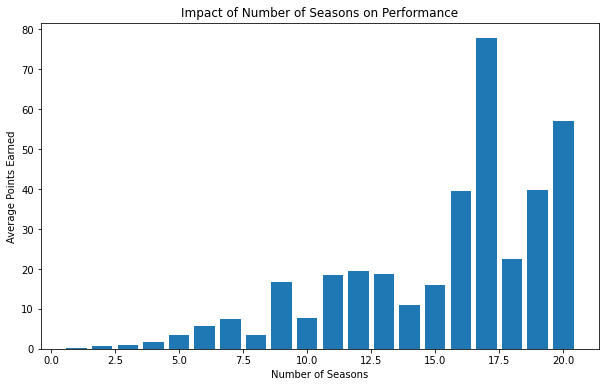

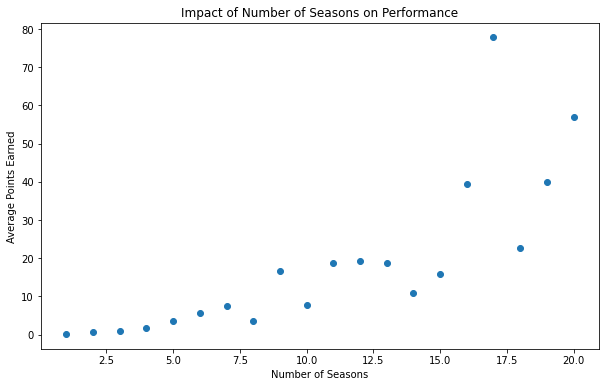

In [14]:
#plot a barplot of dataframe above
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x='year', height='points', data=plott)
ax.set_xlabel('Number of Seasons')
ax.set_ylabel('Average Points Earned')
ax.set_title('Impact of Number of Seasons on Performance')
plt.show()

# fig, ax = plt.subplots(figsize=(10, 6))
# ax.plot(plott['year'], plott['points'])
# ax.set_xlabel('Number of Seasons')
# ax.set_ylabel('Average Points Earned')
# ax.set_title('Impact of Number of Seasons on Performance')
# plt.show()


fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x='year', y='points', data=plott)
ax.set_xlabel('Number of Seasons')
ax.set_ylabel('Average Points Earned')
ax.set_title('Impact of Number of Seasons on Performance')
plt.show()



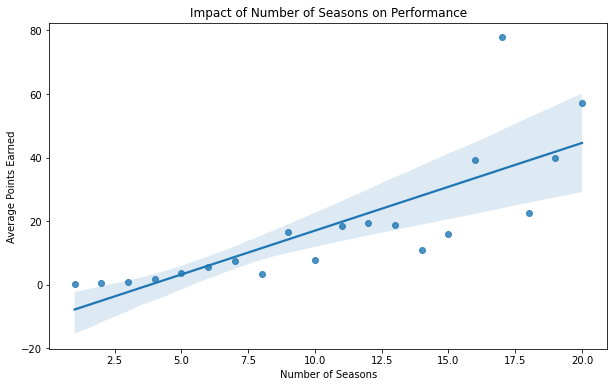

In [15]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 6))
sns.regplot(x='year', y='points', data=plott, ax=ax)
ax.set_xlabel('Number of Seasons')
ax.set_ylabel('Average Points Earned')
ax.set_title('Impact of Number of Seasons on Performance')
plt.show()
